In [1]:
import pickle
import numpy as np
import sys
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from six import StringIO
import pydotplus 
from IPython.display import Image

sys.path.append("..")
from utils import plot_confusion_matrix

random_state = 42
classnames = ['Triclinic', 'Monoclinic', 'Orthorombic', 'Tetragonal', 'Trigonal', 'Hexagonal', 'Cubic']

In [2]:
train_data = pd.concat((pd.read_csv('data/train.csv'), pd.read_csv('data/test.csv')))

train_data['is_cubic'] = np.zeros(len(train_data))
train_data.loc[train_data['crystal_system']==6,'is_cubic']=1

n_cubic = train_data['is_cubic'].value_counts()[1]
train_data.loc[train_data['is_cubic']==0,:].sample(n=n_cubic, random_state=random_state)

data_balanced=pd.concat((train_data.loc[train_data['is_cubic']==1,:], train_data.loc[train_data['is_cubic']==0,:].sample(n=n_cubic)), axis=0)
data_balanced = data_balanced.sample(frac=1)

<AxesSubplot:>

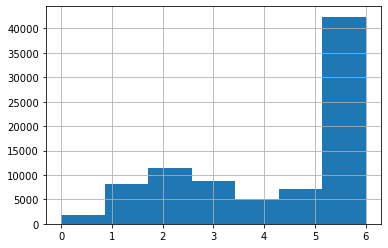

In [3]:
# ['Triclinic', 'Monoclinic', 'Orthorombic', 'Tetragonal', 'Trigonal', 'Hexagonal', 'Cubic']
data_balanced['crystal_system'].hist(bins=7)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    1.4s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.5s finished


10CV score:  83.25666973321067


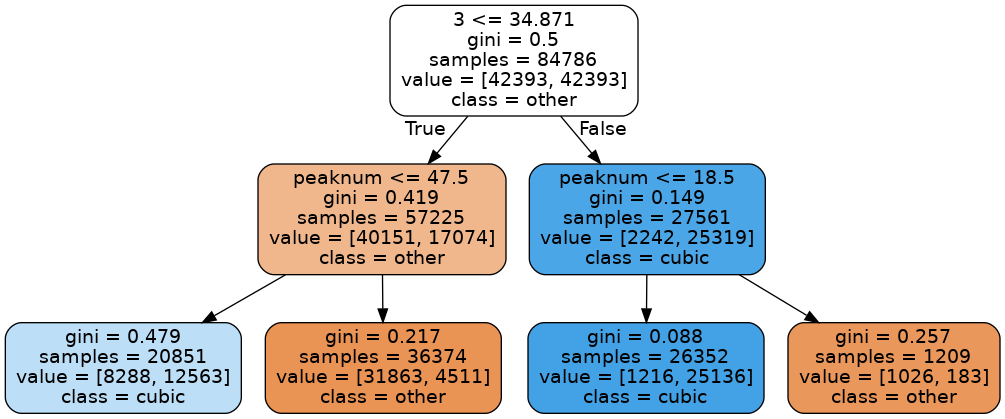

In [4]:
X = data_balanced[[str(i) for i in range(1, 11)] + ['peaknum']]
y = data_balanced['is_cubic']

clf = DecisionTreeClassifier(criterion='gini',
                             max_features=8,
                             min_samples_leaf=1,
                             min_samples_split=2,
                             max_depth=2, random_state=8)
pred_cv = cross_val_predict(clf, X, y,
                            cv=10,
                            n_jobs=-1,
                            verbose=2)
clf.fit(X, y)

print('10CV score: ', metrics.accuracy_score(y, pred_cv)*100)

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                     feature_names=list(X.columns),
                     class_names=['other', 'cubic'],
                     filled=True,
                     rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), retina=True,unconfined=True)

Confusion matrix, without normalization


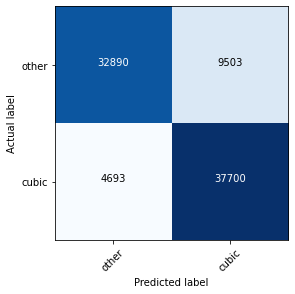

In [5]:
classnames = ['Triclinic', 'Monoclinic', 'Orthorombic', 'Tetragonal', 'Trigonal', 'Hexagonal']

cnf_matrix = metrics.confusion_matrix(y, pred_cv)
plot_confusion_matrix(cnf_matrix, classes=['other', 'cubic'])

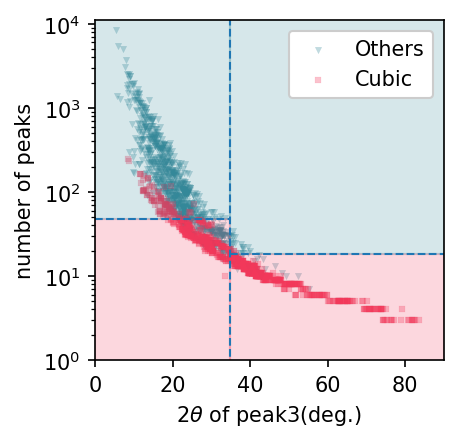

In [6]:
import matplotlib.patches as pat

fig = plt.figure(figsize=(3,3), dpi=150)
ax = fig.add_subplot(111)
ax.scatter(X[y == 0]["3"][:1000], X[y == 0]['peaknum'][:1000], c = '#348899', marker = 'v', alpha = 0.3, s=10, label = 'Others', lw=0.1)
ax.scatter(X[y == 1]["3"][:1000], X[y == 1]['peaknum'][:1000], c = '#F2385A', marker = 's', alpha = 0.3, s=10, label = 'Cubic', lw=0.1)
ax.set_yscale('log')
ax.set_xlim(0, 90)
ax.set_ylim(1, 11000)
legend = ax.legend(framealpha=1)

ax.set_xlabel(r'2$\theta$ of peak3(deg.)')
ax.set_ylabel('number of peaks')
plt.vlines(34.9, 0, 20000, linestyles='--', lw = 1) #vline→3rd peak pos
plt.hlines(47.5,0, 34.9, linestyles='--', lw = 1) # hline→peaknum
plt.hlines(18.5,34.9, 90, linestyles='--', lw = 1) # hline→peaknum

rec_cubic1 = pat.Rectangle(xy = (34.9, 0), width = 90-34.9, height = 18.5, angle = 0, color = "#F2385A", alpha = 0.2)
rec_other1 = pat.Rectangle(xy = (34.9, 18.5), width = 90-34.9, height = 20000-18.5, angle = 0, color = "#348899", alpha = 0.2)
rec_cubic2 = pat.Rectangle(xy = (0, 0), width = 34.9, height = 47.5, angle = 0, color = "#F2385A", alpha = 0.2)
rec_other2 = pat.Rectangle(xy = (0, 47.5), width = 34.9, height = 20000-18.5, angle = 0, color = "#348899", alpha = 0.2)

ax.add_patch(rec_cubic1)
ax.add_patch(rec_other1)
ax.add_patch(rec_cubic2)
ax.add_patch(rec_other2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    1.0s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.1s finished


10CV score:  83.13046965300876


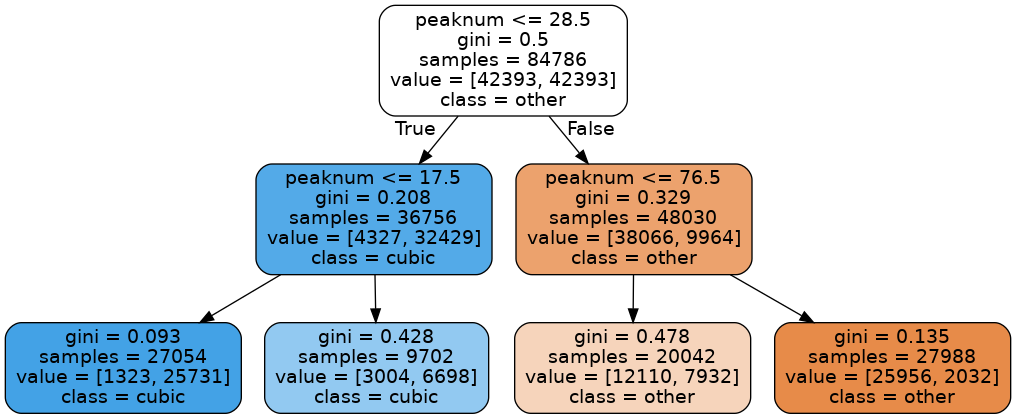

In [7]:
X = data_balanced[[str(i) for i in range(1, 11)] + ['peaknum']]
y = data_balanced['is_cubic']

clf = DecisionTreeClassifier(criterion='gini',
                             max_features=8,
                             min_samples_leaf=1,
                             min_samples_split=2,
                             max_depth=2, random_state=9)
pred_cv = cross_val_predict(clf, X, y,
                            cv=10,
                            n_jobs=-1,
                            verbose=2)
clf.fit(X, y)

print('10CV score: ', metrics.accuracy_score(y, pred_cv)*100)

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                     feature_names=list(X.columns),
                     class_names=['other', 'cubic'],
                     filled=True,
                     rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), retina=True,unconfined=True)

Confusion matrix, without normalization


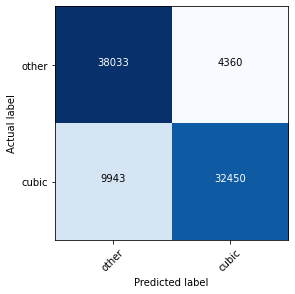

In [8]:
classnames = ['Triclinic', 'Monoclinic', 'Orthorombic', 'Tetragonal', 'Trigonal', 'Hexagonal']

cnf_matrix = metrics.confusion_matrix(y, pred_cv)
plot_confusion_matrix(cnf_matrix, classes=['other', 'cubic'])

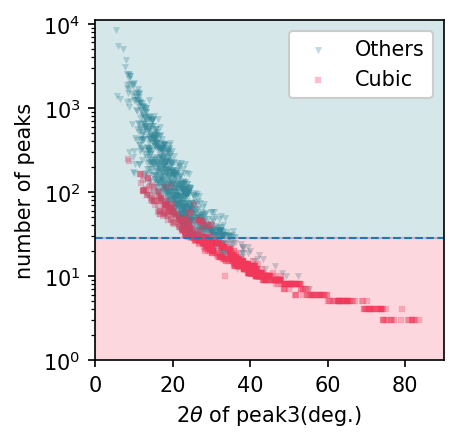

In [9]:
import matplotlib.patches as pat

fig = plt.figure(figsize=(3,3), dpi=150)
ax = fig.add_subplot(111)
ax.scatter(X[y == 0]["3"][:1000], X[y == 0]['peaknum'][:1000], c = '#348899', marker = 'v', alpha = 0.3, s=10, label = 'Others', lw=0.1)
ax.scatter(X[y == 1]["3"][:1000], X[y == 1]['peaknum'][:1000], c = '#F2385A', marker = 's', alpha = 0.3, s=10, label = 'Cubic', lw=0.1)
ax.set_yscale('log')
ax.set_xlim(0, 90)
ax.set_ylim(1, 11000)
legend = ax.legend(framealpha=1)

ax.set_xlabel(r'2$\theta$ of peak3(deg.)')
ax.set_ylabel('number of peaks')
plt.hlines(28.5, 0, 90, linestyles='--', lw = 1) # hline→peaknum

rec_cubic1 = pat.Rectangle(xy = (0, 0), width = 90, height = 28.5, angle = 0, color = "#F2385A", alpha = 0.2)
rec_other1 = pat.Rectangle(xy = (0, 28.5), width = 90, height = 20000-28.5, angle = 0, color = "#348899", alpha = 0.2)
ax.add_patch(rec_cubic1)
ax.add_patch(rec_other1)